In [172]:
import random
import string
from datetime import datetime, timedelta
import pandas as pd
def create_interaction_df(num_interactions):
    interlocutors = ['cliente' if random.random() < 0.5 else 'atendente' for i in range(num_interactions)]
    starts = [datetime(2022, 4, 1) + timedelta(minutes=random.randint(0, 43200)) for i in range(num_interactions)]
    ends = [starts[i] + timedelta(seconds=random.randint(60, 600)) for i in range(num_interactions)]
    durations = [(ends[i] - starts[i]).total_seconds() for i in range(num_interactions)]
    num_words = [random.randint(1, 50) for i in range(num_interactions)]
    reasons = [' '.join(random.choices(['problema', 'dúvida', 'reclamação', 'elogio'], k=random.randint(1, 3))) for i in range(num_interactions)]
    results = ['Resolvido' if random.random() < 0.8 else 'Não resolvido' for i in range(num_interactions)]
    wait_times = [random.randint(0, 300) for i in range(num_interactions)]
    
    true_call_ids = [f'Call-{i}' for i in range(1, 21)]
    call_ids = []
    for i in range(20):
        call_ids += [true_call_ids[i]]*5
    
    df = pd.DataFrame({
        'tipo_de_interlocutor': interlocutors,
        'papel_na_interacao': ['cliente' if interlocutors[i] == 'atendente' else 'atendente' for i in range(num_interactions)],
        'id_da_chamada': call_ids,
        'inicio_interacao': starts,
        'fim_interacao': ends,
        'duracao_da_interacao': durations,
        'quantidade_de_palavras': num_words,
        'motivo_do_contato': reasons,
        'resultado_da_interacao': results,
        'tempo_de_espera': wait_times
    })
    
    return df

# generate a DataFrame with 100 interactions and 20 true call IDs
df = create_interaction_df(100)

In [173]:
df.head()

,tipo_de_interlocutor,papel_na_interacao,id_da_chamada,inicio_interacao,fim_interacao,duracao_da_interacao,quantidade_de_palavras,motivo_do_contato,resultado_da_interacao,tempo_de_espera
0,cliente,atendente,Call-1,2022-04-29 04:55:00,2022-04-29 05:01:07,367.0,37,elogio dúvida elogio,Não resolvido,41
1,atendente,cliente,Call-1,2022-04-20 14:04:00,2022-04-20 14:08:29,269.0,42,elogio elogio,Resolvido,24
2,atendente,cliente,Call-1,2022-04-22 23:20:00,2022-04-22 23:26:31,391.0,37,problema elogio,Resolvido,14
3,cliente,atendente,Call-1,2022-04-10 03:50:00,2022-04-10 03:51:08,68.0,20,reclamação problema,Resolvido,117
4,cliente,atendente,Call-1,2022-04-05 03:43:00,2022-04-05 03:49:00,360.0,36,elogio elogio reclamação,Resolvido,279


In [174]:
df.columns

Index(['tipo_de_interlocutor', 'papel_na_interacao', 'id_da_chamada',
       'inicio_interacao', 'fim_interacao', 'duracao_da_interacao',
       'quantidade_de_palavras', 'motivo_do_contato', 'resultado_da_interacao',
       'tempo_de_espera'],
      dtype='object')

## Agrupamento Via ID

In [175]:
class InteractionAnalyzerPorChamada:

    def __init__(self, df):
        self.df = df

    def duracao_media_por_chamada(self):
        return self.df.groupby('id_da_chamada')['duracao_da_interacao'].mean().reset_index()

    def media_de_palavras_por_chamada(self):
        return self.df.groupby('id_da_chamada')['quantidade_de_palavras'].mean().reset_index()

    def quantidade_de_interacoes_resolvidas(self):
        return self.df[self.df['resultado_da_interacao'] == 'Resolvido'].groupby('id_da_chamada')['resultado_da_interacao'].count().reset_index()

    def quantidade_de_interacoes_nao_resolvidas(self):
        return self.df[self.df['resultado_da_interacao'] == 'Não resolvido'].groupby('id_da_chamada')['resultado_da_interacao'].count().reset_index()

    def percentual_de_interacoes_resolvidas_por_chamada(self):
        return self.df.groupby(['id_da_chamada'])['resultado_da_interacao'].apply(lambda x: (x == 'Resolvido').sum() / len(x)).reset_index()

    def inicio_interacao_por_chamada(self):
        return self.df.groupby('id_da_chamada')['inicio_interacao'].first().reset_index()

    def fim_interacao_por_chamada(self):
        return self.df.groupby('id_da_chamada')['fim_interacao'].last().reset_index()

    def duracao_total_por_chamada(self):
        return self.df.groupby('id_da_chamada')['duracao_da_interacao'].sum().reset_index()

    def quantidade_total_de_palavras_por_chamada(self):
        return self.df.groupby('id_da_chamada')['quantidade_de_palavras'].sum().reset_index()

    def quantidade_de_interlocutores_por_chamada(self):
        return self.df.groupby('id_da_chamada')['tipo_de_interlocutor'].nunique().reset_index()


In [176]:
# Crie uma instância da classe InteractionAnalyzerPorChamada com o dataframe desejado
analyzer = InteractionAnalyzerPorChamada(df)

# Calcule todos os indicadores
duracao_media = analyzer.duracao_media_por_chamada()
media_palavras = analyzer.media_de_palavras_por_chamada()
interacoes_resolvidas = analyzer.quantidade_de_interacoes_resolvidas()
interacoes_nao_resolvidas = analyzer.quantidade_de_interacoes_nao_resolvidas()
percentual_resolvidas = analyzer.percentual_de_interacoes_resolvidas_por_chamada()
inicio_interacao = analyzer.inicio_interacao_por_chamada()
fim_interacao = analyzer.fim_interacao_por_chamada()
duracao_total = analyzer.duracao_total_por_chamada()
quantidade_palavras = analyzer.quantidade_total_de_palavras_por_chamada()
quantidade_interlocutores = analyzer.quantidade_de_interlocutores_por_chamada()

# Una os resultados em um único dataframe final usando o método merge do pandas
final_df = duracao_media.merge(media_palavras, on='id_da_chamada')
final_df = final_df.merge(interacoes_resolvidas, on='id_da_chamada')
final_df = final_df.merge(interacoes_nao_resolvidas, on='id_da_chamada')
final_df = final_df.merge(percentual_resolvidas, on='id_da_chamada')
final_df = final_df.merge(inicio_interacao, on='id_da_chamada')
final_df = final_df.merge(fim_interacao, on='id_da_chamada')
final_df = final_df.merge(duracao_total, on='id_da_chamada')
final_df = final_df.merge(quantidade_palavras, on='id_da_chamada')
final_df = final_df.merge(quantidade_interlocutores, on='id_da_chamada')

# Renomeie as colunas de acordo com os nomes dos indicadores
final_df.columns = ['id_da_chamada', 'duracao_media', 'media_palavras', 'qtd_resolvidas', 'qtd_nao_resolvidas', 'percentual_resolvidas', 'inicio_interacao', 'fim_interacao', 'duracao_total', 'qtd_palavras_total', 'qtd_interlocutores']


In [177]:
final_df.T

,0,1,2,3,4,5,6,7,8,9,10,11
id_da_chamada,Call-1,Call-10,Call-13,Call-14,Call-15,Call-19,Call-2,Call-20,Call-3,Call-4,Call-6,Call-7
duracao_media,291.0,360.6,389.2,388.4,373.8,156.4,337.2,259.6,194.6,254.2,332.4,355.0
media_palavras,34.4,10.0,18.8,23.2,23.0,19.0,28.2,11.2,38.4,22.4,27.6,19.0
qtd_resolvidas,4,3,3,3,2,2,4,4,4,4,4,4
qtd_nao_resolvidas,1,2,2,2,3,3,1,1,1,1,1,1
percentual_resolvidas,0.8,0.6,0.6,0.6,0.4,0.4,0.8,0.8,0.8,0.8,0.8,0.8
inicio_interacao,2022-04-29 04:55:00,2022-04-18 12:18:00,2022-04-27 13:21:00,2022-04-02 20:45:00,2022-04-18 19:05:00,2022-04-05 18:08:00,2022-04-17 00:56:00,2022-04-09 06:39:00,2022-04-25 11:41:00,2022-04-09 07:40:00,2022-04-09 20:23:00,2022-04-22 17:02:00
fim_interacao,2022-04-05 03:49:00,2022-04-30 20:32:41,2022-04-20 08:07:23,2022-04-03 15:29:47,2022-04-20 02:14:15,2022-04-12 19:09:46,2022-04-29 12:19:00,2022-04-21 03:56:23,2022-04-15 04:13:07,2022-04-06 03:46:33,2022-04-22 03:04:57,2022-04-17 01:57:57
duracao_total,1455.0,1803.0,1946.0,1942.0,1869.0,782.0,1686.0,1298.0,973.0,1271.0,1662.0,1775.0
qtd_palavras_total,172,50,94,116,115,95,141,56,192,112,138,95


In [178]:
final_df.describe().T

,count,mean,std,min,25%,50%,75%,max
duracao_media,12.0,307.700000,76.975817,156.4,258.25,334.8,363.90,389.2
media_palavras,12.0,22.933333,8.385847,10.0,18.95,22.7,27.75,38.4
qtd_resolvidas,12.0,3.416667,0.792961,2.0,3.00,4.0,4.00,4.0
qtd_nao_resolvidas,12.0,1.583333,0.792961,1.0,1.00,1.0,2.00,3.0
percentual_resolvidas,12.0,0.683333,0.158592,0.4,0.60,0.8,0.80,0.8
duracao_total,12.0,1538.500000,384.879084,782.0,1291.25,1674.0,1819.50,1946.0
qtd_palavras_total,12.0,114.666667,41.929233,50.0,94.75,113.5,138.75,192.0
qtd_interlocutores,12.0,2.000000,0.000000,2.0,2.00,2.0,2.00,2.0


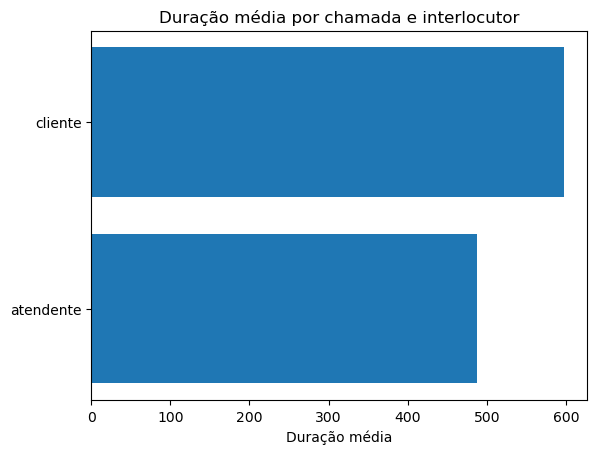

In [182]:
import matplotlib.pyplot as plt

plt.barh(duracao_media['tipo_de_interlocutor'], duracao_media['duracao_da_interacao'])
plt.xlabel('Duração média')
plt.title('Duração média por chamada e interlocutor')
plt.show()


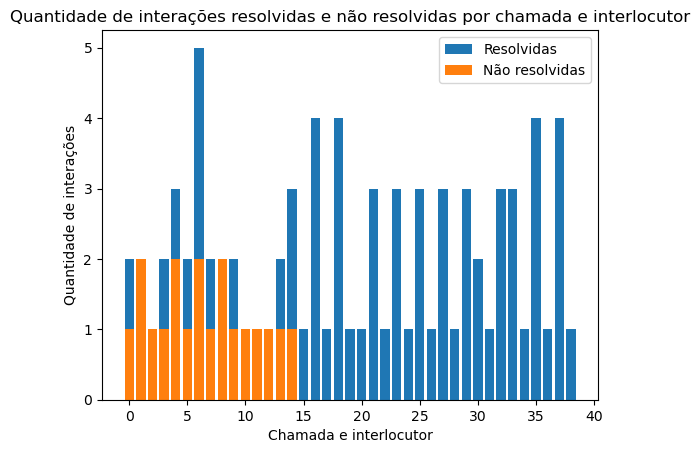

In [183]:
import matplotlib.pyplot as plt

resolvidas = interacoes_resolvidas['resultado_da_interacao']
nao_resolvidas = interacoes_nao_resolvidas['resultado_da_interacao']

fig, ax = plt.subplots()
ax.bar(interacoes_resolvidas.index, resolvidas, label='Resolvidas')
ax.bar(interacoes_nao_resolvidas.index, nao_resolvidas, label='Não resolvidas')
ax.set_xlabel('Chamada e interlocutor')
ax.set_ylabel('Quantidade de interações')
ax.set_title('Quantidade de interações resolvidas e não resolvidas por chamada e interlocutor')
ax.legend()
plt.show()


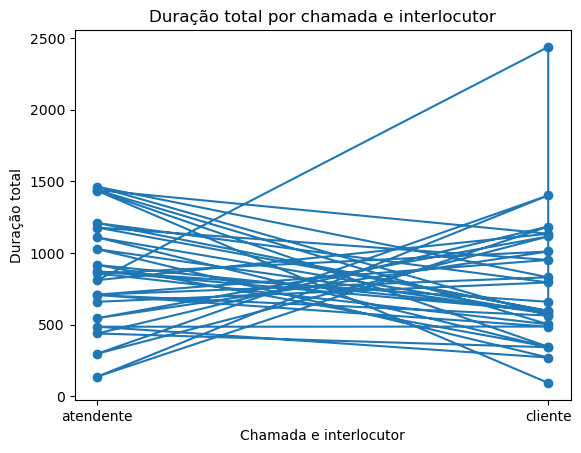

In [184]:
import matplotlib.pyplot as plt

plt.plot(duracao_total['tipo_de_interlocutor'], duracao_total['duracao_da_interacao'], marker='o')
plt.xlabel('Chamada e interlocutor')
plt.ylabel('Duração total')
plt.title('Duração total por chamada e interlocutor')
plt.show()


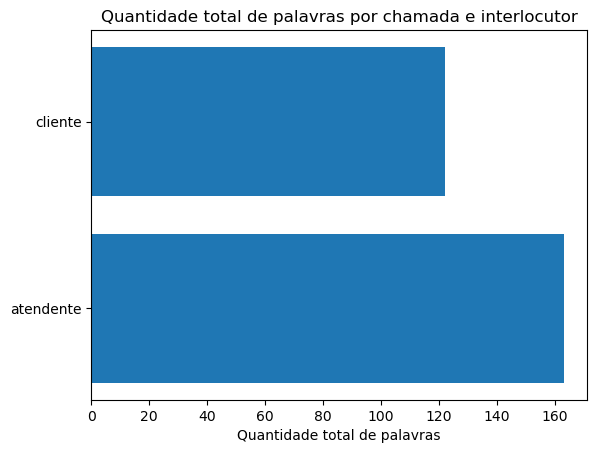

In [185]:
import matplotlib.pyplot as plt

plt.barh(quantidade_palavras['tipo_de_interlocutor'], quantidade_palavras['quantidade_de_palavras'])
plt.xlabel('Quantidade total de palavras')
plt.title('Quantidade total de palavras por chamada e interlocutor')
plt.show()


## Agrupamento Via ID¶e Tipo_de_interlocutor

In [179]:
class InteractionAnalyzerPorChamadav2:

    def __init__(self, df):
        self.df = df

    def duracao_media_por_chamada_e_interlocutor(self):
        return self.df.groupby(['id_da_chamada', 'tipo_de_interlocutor'])['duracao_da_interacao'].mean().reset_index()

    def media_de_palavras_por_chamada_e_interlocutor(self):
        return self.df.groupby(['id_da_chamada', 'tipo_de_interlocutor'])['quantidade_de_palavras'].mean().reset_index()

    def quantidade_de_interacoes_resolvidas_por_chamada_e_interlocutor(self):
        return self.df[self.df['resultado_da_interacao'] == 'Resolvido'].groupby(['id_da_chamada', 'tipo_de_interlocutor'])['resultado_da_interacao'].count().reset_index()

    def quantidade_de_interacoes_nao_resolvidas_por_chamada_e_interlocutor(self):
        return self.df[self.df['resultado_da_interacao'] == 'Não resolvido'].groupby(['id_da_chamada', 'tipo_de_interlocutor'])['resultado_da_interacao'].count().reset_index()

    def percentual_de_interacoes_resolvidas_por_chamada_e_interlocutor(self):
        return self.df.groupby(['id_da_chamada', 'tipo_de_interlocutor'])['resultado_da_interacao'].apply(lambda x: (x == 'Resolvido').sum() / len(x)).reset_index()

    def inicio_interacao_por_chamada_e_interlocutor(self):
        return self.df.groupby(['id_da_chamada', 'tipo_de_interlocutor'])['inicio_interacao'].first().reset_index()

    def fim_interacao_por_chamada_e_interlocutor(self):
        return self.df.groupby(['id_da_chamada', 'tipo_de_interlocutor'])['fim_interacao'].last().reset_index()

    def duracao_total_por_chamada_e_interlocutor(self):
        return self.df.groupby(['id_da_chamada', 'tipo_de_interlocutor'])['duracao_da_interacao'].sum().reset_index()

    def quantidade_total_de_palavras_por_chamada_e_interlocutor(self):
        return self.df.groupby(['id_da_chamada', 'tipo_de_interlocutor'])['quantidade_de_palavras'].sum().reset_index()

    def quantidade_de_interlocutores_por_chamada_e_interlocutor(self):
        df_temp = self.df.rename(columns={'tipo_de_interlocutor': 'tipo_de_interlocutor_novo'})
        return df_temp.groupby(['id_da_chamada', 'tipo_de_interlocutor_novo'])['tipo_de_interlocutor_novo'].nunique().reset_index(drop=True)


In [180]:
# Criação do objeto InteractionAnalyzerPorChamadav2
analyzer = InteractionAnalyzerPorChamadav2(df)

# Cálculo dos indicadores
duracao_media = analyzer.duracao_media_por_chamada_e_interlocutor()
media_palavras = analyzer.media_de_palavras_por_chamada_e_interlocutor()
interacoes_resolvidas = analyzer.quantidade_de_interacoes_resolvidas_por_chamada_e_interlocutor()
interacoes_nao_resolvidas = analyzer.quantidade_de_interacoes_nao_resolvidas_por_chamada_e_interlocutor()
percentual_interacoes_resolvidas = analyzer.percentual_de_interacoes_resolvidas_por_chamada_e_interlocutor()
inicio_interacao = analyzer.inicio_interacao_por_chamada_e_interlocutor()
fim_interacao = analyzer.fim_interacao_por_chamada_e_interlocutor()
duracao_total = analyzer.duracao_total_por_chamada_e_interlocutor()
quantidade_palavras = analyzer.quantidade_total_de_palavras_por_chamada_e_interlocutor()
quantidade_interlocutores = analyzer.quantidade_de_interlocutores_por_chamada_e_interlocutor()

# Concatenação dos dataframes
resultados = pd.concat([
    duracao_media,
    media_palavras,
    interacoes_resolvidas,
    interacoes_nao_resolvidas,
    percentual_interacoes_resolvidas,
    inicio_interacao,
    fim_interacao,
    duracao_total,
    quantidade_palavras,
    quantidade_interlocutores
], axis=1)

# Exibição do resultado
resultados.T

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
id_da_chamada,Call-1,Call-1,Call-10,Call-10,Call-11,Call-11,Call-12,Call-13,Call-13,Call-14,...,Call-5,Call-5,Call-6,Call-6,Call-7,Call-7,Call-8,Call-8,Call-9,Call-9
tipo_de_interlocutor,atendente,cliente,atendente,cliente,atendente,cliente,cliente,atendente,cliente,atendente,...,atendente,cliente,atendente,cliente,atendente,cliente,atendente,cliente,atendente,cliente
duracao_da_interacao,330.0,265.0,403.0,297.0,290.666667,330.0,487.6,270.333333,567.5,359.75,...,487.666667,415.5,355.0,317.333333,294.5,597.0,229.25,346.0,358.5,94.0
id_da_chamada,Call-1,Call-1,Call-10,Call-10,Call-11,Call-11,Call-12,Call-13,Call-13,Call-14,...,Call-5,Call-5,Call-6,Call-6,Call-7,Call-7,Call-8,Call-8,Call-9,Call-9
tipo_de_interlocutor,atendente,cliente,atendente,cliente,atendente,cliente,cliente,atendente,cliente,atendente,...,atendente,cliente,atendente,cliente,atendente,cliente,atendente,cliente,atendente,cliente
quantidade_de_palavras,39.5,31.0,14.666667,3.0,11.333333,33.0,24.4,17.666667,20.5,28.25,...,36.0,6.0,24.5,29.666667,20.5,13.0,40.75,29.0,27.0,13.0
id_da_chamada,Call-1,Call-1,Call-10,Call-10,Call-11,Call-11,Call-12,Call-13,Call-13,Call-14,...,Call-5,Call-5,Call-6,Call-6,Call-7,Call-7,Call-8,Call-8,Call-9,Call-9
tipo_de_interlocutor,atendente,cliente,atendente,cliente,atendente,cliente,cliente,atendente,cliente,atendente,...,atendente,cliente,atendente,cliente,atendente,cliente,atendente,cliente,atendente,cliente
resultado_da_interacao,2,2,1,2,3,2,5,2,1,2,...,3,2,1,3,3,1,4,1,4,1
id_da_chamada,Call-1,Call-10,Call-13,Call-13,Call-14,Call-15,Call-15,Call-19,Call-19,Call-2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [181]:
resultados.describe().T

,count,mean,std,min,25%,50%,75%,max
duracao_da_interacao,39.0,337.370085,128.773775,94.000000,270.666667,330.0,409.25,597.0
quantidade_de_palavras,39.0,22.476068,11.267649,3.000000,13.833333,24.4,31.25,42.0
resultado_da_interacao,39.0,2.076923,1.155869,1.000000,1.000000,2.0,3.00,5.0
resultado_da_interacao,15.0,1.266667,0.457738,1.000000,1.000000,1.0,1.50,2.0
resultado_da_interacao,39.0,0.835470,0.232963,0.333333,0.708333,1.0,1.00,1.0
duracao_da_interacao,39.0,825.692308,452.656495,94.000000,524.500000,795.0,1112.50,2438.0
quantidade_de_palavras,39.0,60.153846,42.839688,3.000000,28.000000,48.0,91.00,163.0
tipo_de_interlocutor_novo,39.0,1.000000,0.000000,1.000000,1.000000,1.0,1.00,1.0


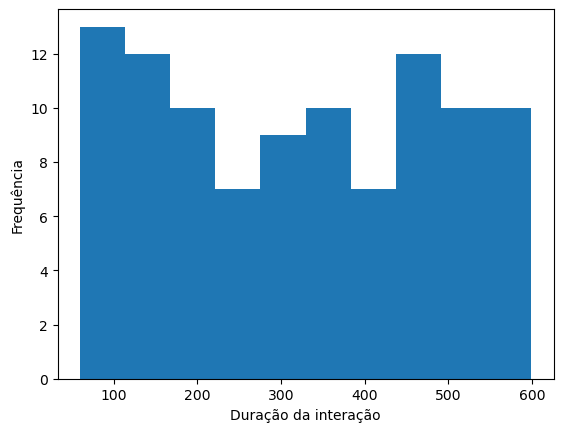

In [187]:
import matplotlib.pyplot as plt

plt.hist(df['duracao_da_interacao'], bins=10)
plt.xlabel('Duração da interação')
plt.ylabel('Frequência')
plt.show()


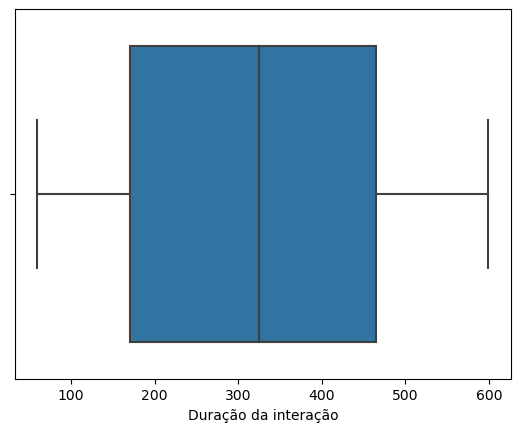

In [188]:
import seaborn as sns

sns.boxplot(x=df['duracao_da_interacao'])
plt.xlabel('Duração da interação')
plt.show()


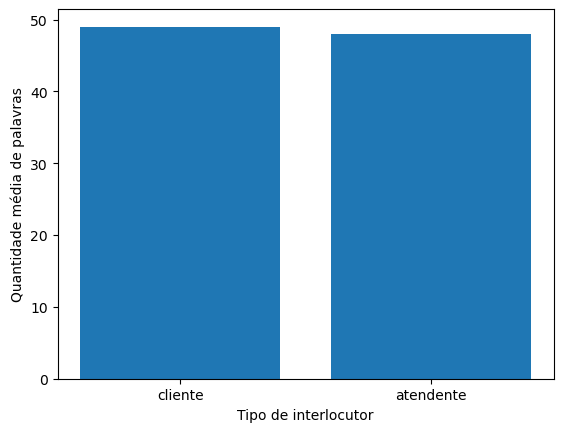

In [189]:
plt.bar(df['tipo_de_interlocutor'], df['quantidade_de_palavras'])
plt.xlabel('Tipo de interlocutor')
plt.ylabel('Quantidade média de palavras')
plt.show()


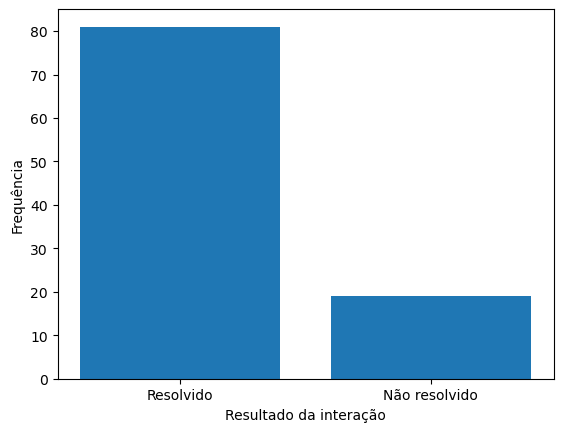

In [191]:
plt.bar(df['resultado_da_interacao'].value_counts().index, df['resultado_da_interacao'].value_counts().values)
plt.xlabel('Resultado da interação')
plt.ylabel('Frequência')
plt.show()


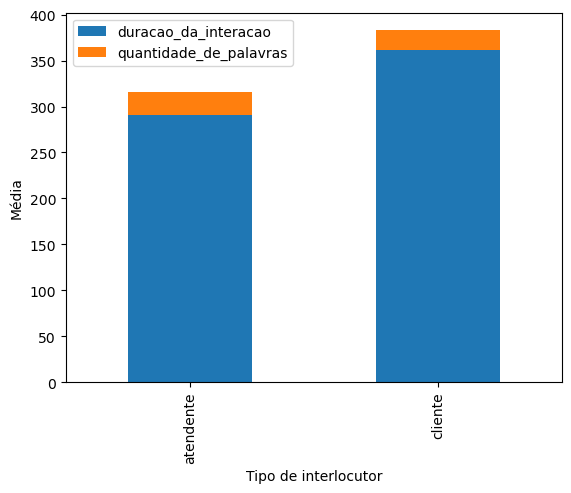

In [193]:
interacoes_por_tipo = df.groupby(['tipo_de_interlocutor']).agg({
    'duracao_da_interacao': 'mean',
    'quantidade_de_palavras': 'mean'
})

interacoes_por_tipo.plot(kind='bar', stacked=True)
plt.xlabel('Tipo de interlocutor')
plt.ylabel('Média')
plt.show()
